In [1]:
import cv2

# Specify the video file or camera index (0 for default camera)
video_capture = cv2.VideoCapture('vid2.mp4')

# Initialize previous_frame outside the loop
previous_frame = None
x = 0
while True:
    # Read a frame from the video
    ret, frame = video_capture.read()

    # Break the loop if the video has ended
    if not ret:
        break

    # Display the frame
    cv2.imshow('Video', frame)

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    # Example: Detect blinking based on changes in intensity
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Check if previous_frame is None (first iteration)
    if previous_frame is not None:
        # Compute the absolute difference between the current frame and the previous frame
        frame_diff = cv2.absdiff(previous_frame, gray_frame)

        # Threshold the difference to identify significant changes
        _, threshold_diff = cv2.threshold(frame_diff, 30, 255, cv2.THRESH_BINARY)

        # Count the number of non-zero pixels in the thresholded difference
        pixel_count = cv2.countNonZero(threshold_diff)

        # If the pixel count exceeds a certain threshold, consider it a blink
        if pixel_count > 100:
            print("Blink detected!")
            x += 1
            
            # Draw a rectangle on the frame to indicate the blink
            cv2.rectangle(frame, (0, 0), (frame.shape[1], frame.shape[0]), (0, 0, 255), 2)

    # Update the previous frame
    previous_frame = gray_frame

# Release the video capture object
video_capture.release()

# Close all windows
cv2.destroyAllWindows()
print(x)


0


In [2]:
import cv2

def detect_blinking_light(video_path):
    """
    This function uses a video file to detect a blinking light and decodes it into a bit stream.
    
    Args:
    video_path (str): The path to the video file.
    
    Returns:
    str: The decoded bit stream
    """
    try:
        # Open the video file
        cap = cv2.VideoCapture(video_path)
        
        # Initialize variables
        bit_stream = ""
        prev_light_state = False
        
        while True:
            # Read frame from the video
            ret, frame = cap.read()
            
            # If the video has ended, exit the loop
            if not ret:
                break
            
            # Convert the frame to grayscale
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            
            # Apply thresholding to detect the blinking light
            _, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
            
            # Find contours in the thresholded image
            contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            
            # Check if a blinking light is detected
            light_detected = len(contours) > 0
            
            # If the light state has changed, update the bit stream
            if light_detected != prev_light_state:
                bit_stream += "1" if light_detected else "0"
                prev_light_state = light_detected
            
            # Display the frame with blinking light detection
            cv2.imshow("Blinking Light Detection", frame)
            
            # Exit the loop if 'q' is pressed
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        
        # Release the video capture and close the window
        cap.release()
        cv2.destroyAllWindows()
        
        return bit_stream
    
    except Exception as e:
        # Log the error
        print(f"Error: {e}")
        return ""

# Example usage with a video file named "example_video.mp4"
bit_stream = detect_blinking_light("vid.mp4")
print(f"Decoded Bit Stream: {bit_stream}")


Decoded Bit Stream: 


In [1]:
import cv2

# Load pre-trained model (replace this with your actual model)
# Here, we use a simple contour detection as an example
counter = 0
def detect_led(frame):
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and improve contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use contour detection to find LED regions
    _, thresh = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours (LEDs) are found
    return len(contours) > 0

# Simulate capturing video from the Raspberry Pi camera (replace this with actual camera code)
def capture_video():
    # In a real-world scenario, capture video from the Raspberry Pi camera
    # For simulation purposes, read a video from file
    return cv2.VideoCapture('vid.mp4')

# Main loop for continuous monitoring
video_capture = capture_video()

while True:
    # Read a frame from the video stream
    _, frame = video_capture.read()

    # Check if the video has ended
    if frame is None:
        break

    # Detect LEDs in the captured frame
    #if detect_led(frame):
    #    # Trigger alarm (replace this with your actual alarm mechanism)
    #    print("LED interruption detected! Triggering alarm.")
    counter += 1

    # Add any necessary delay or loop control logic

# Release the video capture object when done
video_capture.release()
print(counter)

0


Frequency: 7.30 Hz


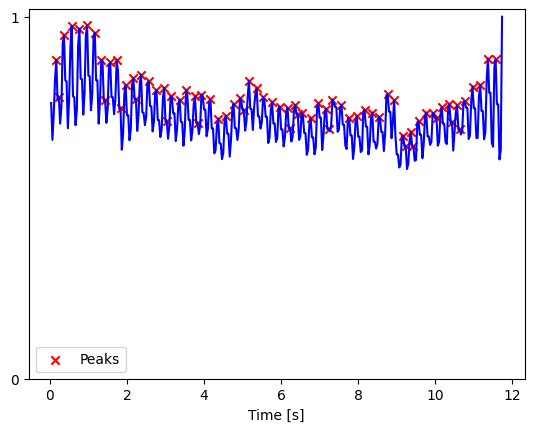

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Read the video file
cap = cv2.VideoCapture("vidscapstone/vid6.mp4")

# Get video properties
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_rate = cap.get(cv2.CAP_PROP_FPS)
t_frame = np.arange(1, n_frames + 1) / frame_rate

# Initialize an array to store the cumulative sum of pixel values
ghost_com = np.zeros(n_frames)

# Process each frame
for f_id in range(n_frames):
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale
    gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calculate the cumulative sum of pixel values
    ghost_com[f_id] = np.sum(gray_image)

# Normalize the cumulative sum
ghost_com /= np.max(ghost_com)

# Find peaks in the normalized cumulative sum signal
peaks, _ = find_peaks(ghost_com)

# Calculate rise time
rise_time = t_frame[peaks[0]]  # Assuming the first peak corresponds to the rise

# Calculate frequency
frequency = len(peaks) / rise_time / 60

# Print the frequency
print("Frequency: {:.2f} Hz".format(frequency))

# Plot the results with markers for the detected peaks
plt.figure()
plt.plot(t_frame, ghost_com, 'b')
plt.scatter(t_frame[peaks], ghost_com[peaks], color='red', marker='x', label='Peaks')
plt.yticks([0, 1])
plt.xlabel('Time [s]')
plt.legend()
plt.show()

# Release the video capture object
cap.release()

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Read the video file
video_path = 'vidscapstone/vid6.mp4'
cap = cv2.VideoCapture(video_path)

# Create a background subtractor
fgbg = cv2.createBackgroundSubtractorMOG2()

# Initialize variables for cumulative sum and time
cumulative_sum = []
t_frame = []

# Process each frame
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Apply background subtraction
    fgmask = fgbg.apply(frame)

    # Find contours in the foreground mask
    contours, _ = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Process each detected contour
    for contour in contours:
        # Calculate cumulative sum for each contour
        x, y, w, h = cv2.boundingRect(contour)
        roi = frame[y:y+h, x:x+w]
        gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        ghost_com = np.sum(gray_roi)

        # Append the cumulative sum value to the list
        cumulative_sum.append(ghost_com)
        t_frame.append(cap.get(cv2.CAP_PROP_POS_MSEC) / 1000.0)  # Convert time to seconds

    # Display the results (optional)
    cv2.imshow('Original Video', frame)
    cv2.imshow('Foreground Mask', fgmask)

    if cv2.waitKey(30) & 0xFF == 27:  # Press 'Esc' to exit
        break

# Release the video capture object
cap.release()
cv2.destroyAllWindows()

# Convert lists to numpy arrays for easier manipulation
cumulative_sum = np.array(cumulative_sum, dtype=np.float64)  # Convert to float
t_frame = np.array(t_frame)

# Normalize the cumulative sum
cumulative_sum /= np.max(cumulative_sum)

# Perform frequency analysis
peaks, _ = find_peaks(cumulative_sum, height=0.5)

# Calculate rise time
rise_time = t_frame[peaks[0]]  # Assuming the first peak corresponds to the rise

# Calculate frequency
frequency = len(peaks) / rise_time

# Print the frequency
print("Frequency: {:.2f} Hz".format(frequency))

# Plot the results with markers for the detected peaks
plt.figure()
plt.plot(t_frame, cumulative_sum, 'b')
plt.scatter(t_frame[peaks], cumulative_sum[peaks], color='red', marker='x', label='Peaks')
plt.yticks([0, 1])
plt.xlabel('Time [s]')
plt.legend()
plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from ultralytics import YOLO

# Load pre-trained YOLO model (you may need to install YOLO and configure it)
net = YOLO("C:/Users/diren/OneDrive/Bureaublad/Jaar 4/Minor/ML3/Challenge/yolo-Weights/yolov8n.pt")
layer_names = net.getUnconnectedOutLayersNames()

# Read the video file
video_path = 'vidscapstone/vid6.mp4'
cap = cv2.VideoCapture(video_path)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Perform object detection
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(layer_names)

    # Process each detected object
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.5 and class_id == 0:  # Assuming class_id 0 corresponds to lights
                # Extract ROI around the detected light
                x, y, w, h = (detection[0:4] * np.array([frame.shape[1], frame.shape[0], frame.shape[1], frame.shape[0]])).astype(int)
                roi = frame[y:y+h, x:x+w]

                # Convert ROI to grayscale
                gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

                # Calculate cumulative sum or other intensity metric
                intensity = np.sum(gray_roi)

                # Perform frequency analysis (similar to previous examples)

    # Display the results (optional)
    cv2.imshow('Original Video', frame)

    if cv2.waitKey(30) & 0xFF == 27:  # Press 'Esc' to exit
        break

# Release the video capture object
cap.release()
cv2.destroyAllWindows()


AttributeError: 'YOLO' object has no attribute 'getUnconnectedOutLayersNames'